In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler

In [2]:
df=pd.read_csv(r"D:\DATA ANALYTICS\DATA SET\house_price_regression_dataset.csv")

In [3]:
print(df.head(10))

   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   
5            3944             5              3        1990  2.475930   
6            3671             1              2        2012  4.911960   
7            3419             1              1        1972  2.805281   
8             630             3              3        1997  1.014286   
9            2185             4              2        1981  3.941604   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+

In [4]:
print(df.tail(10))

     Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
990            1304             5              2        1968  4.849464   
991            1779             5              3        2016  3.326538   
992            4077             2              1        1989  4.687891   
993            3401             5              3        1996  3.542473   
994            1887             2              1        2014  1.882575   
995            3261             4              1        1978  2.165110   
996            3179             1              2        1999  2.977123   
997            2606             4              2        1962  4.055067   
998            4723             5              2        1950  1.930921   
999            3268             4              2        1983  3.108790   

     Garage_Size  Neighborhood_Quality    House_Price  
990            2                     6  357477.332667  
991            1                    10  480192.245236  
992            2 

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB
None


In [6]:
print(df.isna().sum())

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64


In [7]:
print(df.isna().sum().sum())

0


In [8]:
print(df.dropna(inplace=True))

None


In [9]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


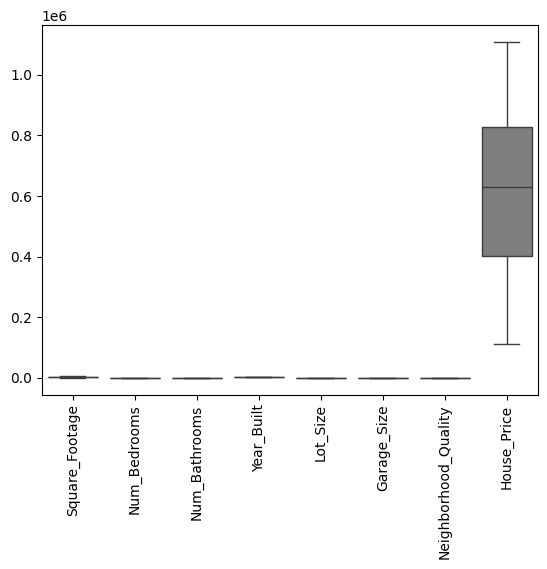

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df) 
plt.xticks(rotation=90)
plt.show()

In [11]:
cor=df.corr(numeric_only=True)
print(cor)

                      Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  \
Square_Footage              1.000000     -0.043564      -0.031584   -0.022392   
Num_Bedrooms               -0.043564      1.000000       0.022848   -0.015820   
Num_Bathrooms              -0.031584      0.022848       1.000000   -0.021063   
Year_Built                 -0.022392     -0.015820      -0.021063    1.000000   
Lot_Size                    0.089479     -0.009355       0.034923   -0.061050   
Garage_Size                 0.030593      0.113761       0.024846   -0.025485   
Neighborhood_Quality       -0.008357     -0.049024       0.017585   -0.009549   
House_Price                 0.991261      0.014633      -0.001862    0.051967   

                      Lot_Size  Garage_Size  Neighborhood_Quality  House_Price  
Square_Footage        0.089479     0.030593             -0.008357     0.991261  
Num_Bedrooms         -0.009355     0.113761             -0.049024     0.014633  
Num_Bathrooms         0.034

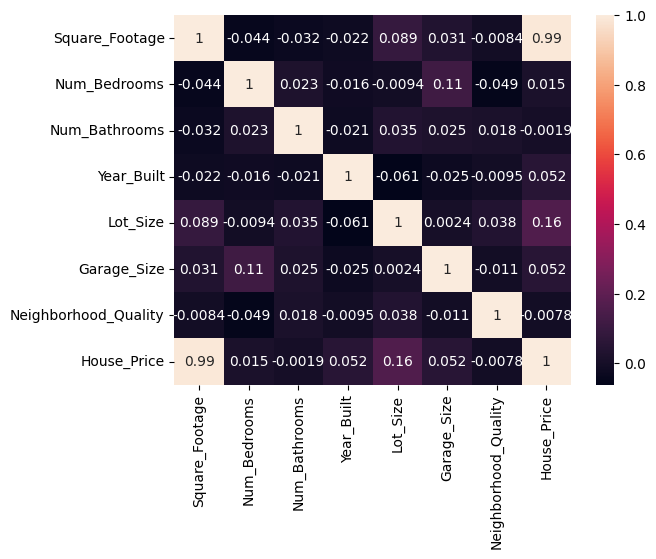

In [12]:
sns.heatmap(cor,annot=True)
plt.show()

In [13]:
print(df.cov(numeric_only=True))

                      Square_Footage  Num_Bedrooms  Num_Bathrooms  \
Square_Footage          1.576318e+06    -78.080861     -32.529135   
Num_Bedrooms           -7.808086e+01      2.037938       0.026757   
Num_Bathrooms          -3.252914e+01      0.026757       0.672944   
Year_Built             -5.800732e+02     -0.465966      -0.356507   
Lot_Size                1.458087e+02     -0.017333       0.037183   
Garage_Size             3.130302e+01      0.132352       0.016611   
Neighborhood_Quality   -3.029282e+01     -0.202052       0.041647   
House_Price             3.155765e+08   5297.019528    -387.334773   

                         Year_Built      Lot_Size   Garage_Size  \
Square_Footage          -580.073173    145.808696     31.303019   
Num_Bedrooms              -0.465966     -0.017333      0.132352   
Num_Bathrooms             -0.356507      0.037183      0.016611   
Year_Built               425.717217     -1.634899     -0.428529   
Lot_Size                  -1.634899      1.

In [14]:
print(df.std(numeric_only=True))

Square_Footage            1255.514921
Num_Bedrooms                 1.427564
Num_Bathrooms                0.820332
Year_Built                  20.632916
Lot_Size                     1.297903
Garage_Size                  0.814973
Neighborhood_Quality         2.887059
House_Price             253568.058375
dtype: float64


In [15]:
print(df.describe())

       Square_Footage  Num_Bedrooms  Num_Bathrooms   Year_Built     Lot_Size  \
count     1000.000000   1000.000000    1000.000000  1000.000000  1000.000000   
mean      2815.422000      2.990000       1.973000  1986.550000     2.778087   
std       1255.514921      1.427564       0.820332    20.632916     1.297903   
min        503.000000      1.000000       1.000000  1950.000000     0.506058   
25%       1749.500000      2.000000       1.000000  1969.000000     1.665946   
50%       2862.500000      3.000000       2.000000  1986.000000     2.809740   
75%       3849.500000      4.000000       3.000000  2004.250000     3.923317   
max       4999.000000      5.000000       3.000000  2022.000000     4.989303   

       Garage_Size  Neighborhood_Quality   House_Price  
count  1000.000000           1000.000000  1.000000e+03  
mean      1.022000              5.615000  6.188610e+05  
std       0.814973              2.887059  2.535681e+05  
min       0.000000              1.000000  1.116269e

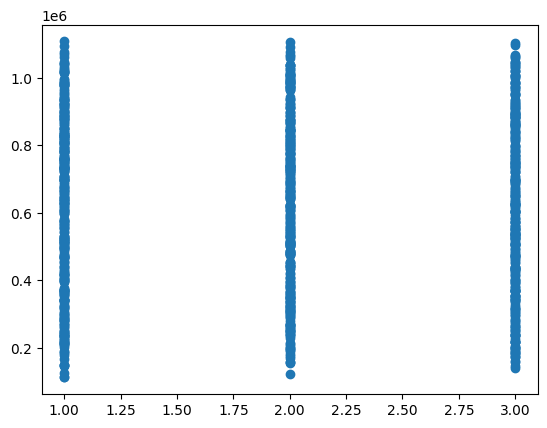

In [23]:
x=df.iloc[:,0:3]
y=df["House_Price"]
plt.scatter(df["Num_Bathrooms"],df["House_Price"])
plt.show()

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
x_train

,Square_Footage,Num_Bedrooms,Num_Bathrooms
687,2103,1,3
500,1884,4,1
332,616,2,3
979,3952,1,2
817,977,5,1
...,...,...,...
835,3728,2,1
192,762,2,3
629,2406,5,2
559,1515,2,1


In [27]:
y_train

687    474659.860055
500    414166.584309
332    180393.628113
979    875163.046069
817    214146.491007
           ...      
835    771385.149781
192    237070.705705
629    533178.240247
559    327253.457983
684    185569.894269
Name: House_Price, Length: 800, dtype: float64

In [28]:
x_test

,Square_Footage,Num_Bedrooms,Num_Bathrooms
993,3401,5,3
859,3781,2,1
298,4347,3,1
553,755,4,1
672,2146,5,2
...,...,...,...
679,2575,2,2
722,4824,1,1
215,3057,3,2
653,2796,3,1


In [29]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred=model.predict(x_test)
y_pred

array([ 765451.95472796,  795461.48677535,  918855.45256829,
        207286.04027203,  504892.06835001,  318761.86902496,
        537415.86075752,  427490.58740615,  977705.90478996,
        426894.3589317 ,  909424.6828833 ,  313741.64669397,
        339729.85276329,  836322.99744692,  712819.32989944,
        869360.20957942,  993148.54486157,  267749.16184489,
        833435.06239739,  543647.13465321,  877509.51536079,
        402478.48270595,  837743.15629413,  376872.2497153 ,
        378582.22441047,  198367.64022006,  666964.48990198,
        706600.4524143 ,  632010.29597579,  920884.23630049,
        380985.73292407,  521171.03520494,  764841.22965898,
        993971.42514234,  838948.00965356,  384011.3128252 ,
        736638.97765075,  745273.76006005,  889537.35415534,
        724277.83322464,  489540.5354171 ,  673383.12618837,
        501270.25997443,  676886.93442015,  662921.4190321 ,
        909721.74702853,  312017.17540426,  395851.78922905,
        763934.49053677,

In [31]:
y_test

993    7.865846e+05
859    7.926815e+05
298    8.956756e+05
553    2.392346e+05
672    5.109681e+05
           ...     
679    5.454827e+05
722    9.240129e+05
215    6.241122e+05
653    6.214605e+05
150    1.006940e+06
Name: House_Price, Length: 200, dtype: float64

In [32]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_pred,y_test)*100
print(accuracy)

98.55514401063016
